#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [1]:
import sys

sys.path.append(
    "../../ex02/template"
)  # This goes up twice in the directories tree (hence in labs)
# then goes down to ex02/template where your files from lab 2 are.

you can now import your desired files, for example, we can import grid_search.py with:

In [2]:
import grid_search  # You then need to call your functions using grid_search.function_name()
import grid_search as gs  # You then need to call your functions using gs.function_name()
from grid_search import *  # You can call any functions of the file with function_name()

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

from test_utils import test

%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [59]:
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights

    w = np.linalg.inv(tx.T @ tx) @ tx.T @ y

    n = y.shape[0]
    e = y - (tx @ w)
    mse = (0.5 / n) * e.T @ e

    return w,mse
    
    # ***************************************************

### You can test your implementation here

In [60]:
test(least_squares)
# NB:
#
# Due to precision issues,
# the output might not be exactly the same
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily mean
# your implementation is wrong.:)

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 13, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    (array([ 0.21212121, -0.12121212]), 1.9114854698043316e-32)
**********************************************************************


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [61]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE

    # Compute the error
    # e = y - (tx @ w)
    # Compute the MSE loss
    # L = (0.5 / y.shape[0]) * (e.T @ e)  # Dot product of e with itself

    n = y.shape[0]
    L = (0.5 / n) * np.sum((y - w[0] - w[1]*tx[:, 1]) ** 2)
    
    return L
    

In [62]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    ### SOLUTION
    # compute loss for each combinationof w0 and w1.
    for ind_row, row in enumerate(grid_w0):
        for ind_col, col in enumerate(grid_w1):
            w = np.array([row, col])
            losses[ind_row, ind_col] = compute_loss(y, tx, w)


    return losses

In [63]:
from grid_search import generate_w, get_best_parameters
def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    """
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained

    print(least_squares(y,tx))

    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=200)
    
    # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    
    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    # Print the results
    print(
        "Grid Search: loss*={l}, w0*={w0}, w1*={w1}".format(
            l=loss_star, w0=w0_star, w1=w1_star)
    )

    
    
    # by least squares vs. grid search
    # ***************************************************
    

Test it here

In [64]:
test_your_least_squares()

(array([73.293922  , 13.47971243]), 15.385887868829396)
Grid Search: loss*=15.6100856524888, w0*=73.36683417085428, w1*=12.8140703517588


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [65]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [66]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly = np.array([x**d for d in range(degree + 1)]).T
    return poly





    
    # ***************************************************

In [67]:
test(build_poly)

✅ Your `build_poly` passed 1 tests.


Once your implementation of `build_poly` passes the test, copy it to `build_polynomial.py`
Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [68]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
    and then running least squares regression."""
    
    # Load dataset
    x, y = load_data()
    print("shape of x {}".format(x.shape))
    print("shape of y {}".format(y.shape))

    # define parameters
    degrees = [1, 3, 7, 12]

    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # Form the polynomial basis for the input data x
        X_poly = build_poly(x, degree)

        # Perform least squares regression to find weights
        weights, residuals, rank, s = np.linalg.lstsq(X_poly, y, rcond=None)

        # Predict the outputs
        y_pred = X_poly @ weights

        # Calculate RMSE (Root Mean Square Error)
        rmse = np.sqrt(np.mean((y - y_pred) ** 2))

        print(
            "Processing {i}th experiment, degree={d}, rmse={loss}".format(
                i=ind + 1, d=degree, loss=rmse
            )
        )

        # Plot the fitted curve
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])

    plt.tight_layout()
    plt.show()


Run polynomial regression

shape of x (50,)
shape of y (50,)
Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.24965870360907302
Processing 4th experiment, degree=12, rmse=0.2403250747037943


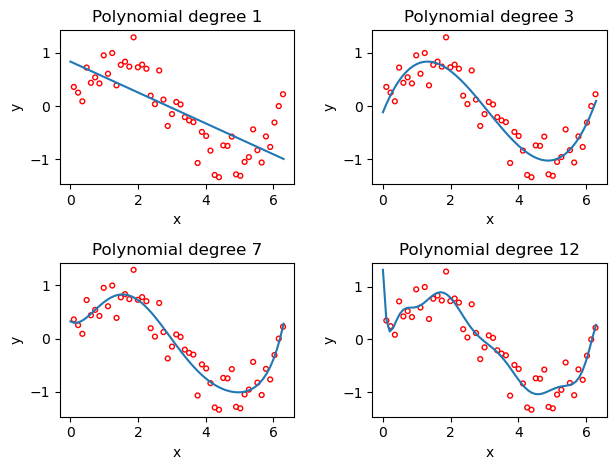

In [69]:
polynomial_regression()

Your results should look like this:

![alt text](visualize_polynomial_regression.png)

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [78]:
def split_data(x, y, ratio, seed=1):
    """
    Split the dataset based on the split ratio. If ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.

    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.
    """
    # Set the random seed for reproducibility
    np.random.seed(seed)
    
    # Get the number of samples
    num_samples = len(x)
    
    # Generate random indices and shuffle the data
    indices = np.random.permutation(num_samples)
    
    # Compute the number of training samples
    num_train = int(np.floor(ratio * num_samples))
    
    # Split the indices into training and testing sets
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]
    
    # Split the data and labels into training and testing sets
    x_tr = x[train_indices]
    x_te = x[test_indices]
    y_tr = y[train_indices]
    y_te = y[test_indices]
    
    return x_tr, x_te, y_tr, y_te


In [79]:
test(split_data)

Could not find any tests for split_data


Then, test your `split_data` function below.

In [80]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """Polynomial regression with different split ratios and different degrees.

    Args:
      x: numpy array of shape (N,), input data.
      y: numpy array of shape (N,), output data.
      degree: integer, degree of the polynomial basis function.
      ratio: float, ratio of training data to the total data.
      seed: integer, seed for random splitting.

    Returns:
      x_tr: numpy array, training input data.
      x_te: numpy array, testing input data.
      y_tr: numpy array, training labels.
      y_te: numpy array, testing labels.
      weights: numpy array, weights from the least squares optimization.
    """
    # ***************************************************
    # Split the data into training and testing sets
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # Form the polynomial basis for training and testing data
    X_tr_poly = build_poly(x_tr, degree)  # Polynomial features for training data
    X_te_poly = build_poly(x_te, degree)  # Polynomial features for testing data

    # ***************************************************
    # Calculate the optimal weights using least squares regression
    weights, _ = least_squares(y_tr, X_tr_poly)

    # ***************************************************
    # Predict values for training and testing sets
    y_tr_pred = X_tr_poly @ weights
    y_te_pred = X_te_poly @ weights

    # ***************************************************
    # Calculate RMSE for the training set
    rmse_tr = np.sqrt(2 * np.mean((y_tr - y_tr_pred) ** 2))

    # Calculate RMSE for the testing set
    rmse_te = np.sqrt(2 * np.mean((y_te - y_te_pred) ** 2))

    # Print out the result
    print(
        "proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
            p=ratio, d=degree, tr=rmse_tr, te=rmse_te
        )
    )

    return x_tr, x_te, y_tr, y_te, weights


Demo time

proportion=0.9, degree=1, Training RMSE=0.698, Testing RMSE=0.256
proportion=0.9, degree=3, Training RMSE=0.374, Testing RMSE=0.292
proportion=0.9, degree=7, Training RMSE=0.359, Testing RMSE=0.311
proportion=0.9, degree=12, Training RMSE=3.370, Testing RMSE=3.399
proportion=0.7, degree=1, Training RMSE=0.730, Testing RMSE=0.497
proportion=0.7, degree=3, Training RMSE=0.352, Testing RMSE=0.436
proportion=0.7, degree=7, Training RMSE=0.322, Testing RMSE=0.471
proportion=0.7, degree=12, Training RMSE=1.307, Testing RMSE=0.911
proportion=0.5, degree=1, Training RMSE=0.643, Testing RMSE=0.751
proportion=0.5, degree=3, Training RMSE=0.338, Testing RMSE=0.419
proportion=0.5, degree=7, Training RMSE=0.329, Testing RMSE=0.402
proportion=0.5, degree=12, Training RMSE=1.188, Testing RMSE=2.499
proportion=0.1, degree=1, Training RMSE=0.605, Testing RMSE=0.755
proportion=0.1, degree=3, Training RMSE=0.121, Testing RMSE=0.650
proportion=0.1, degree=7, Training RMSE=16.074, Testing RMSE=19.241
propo

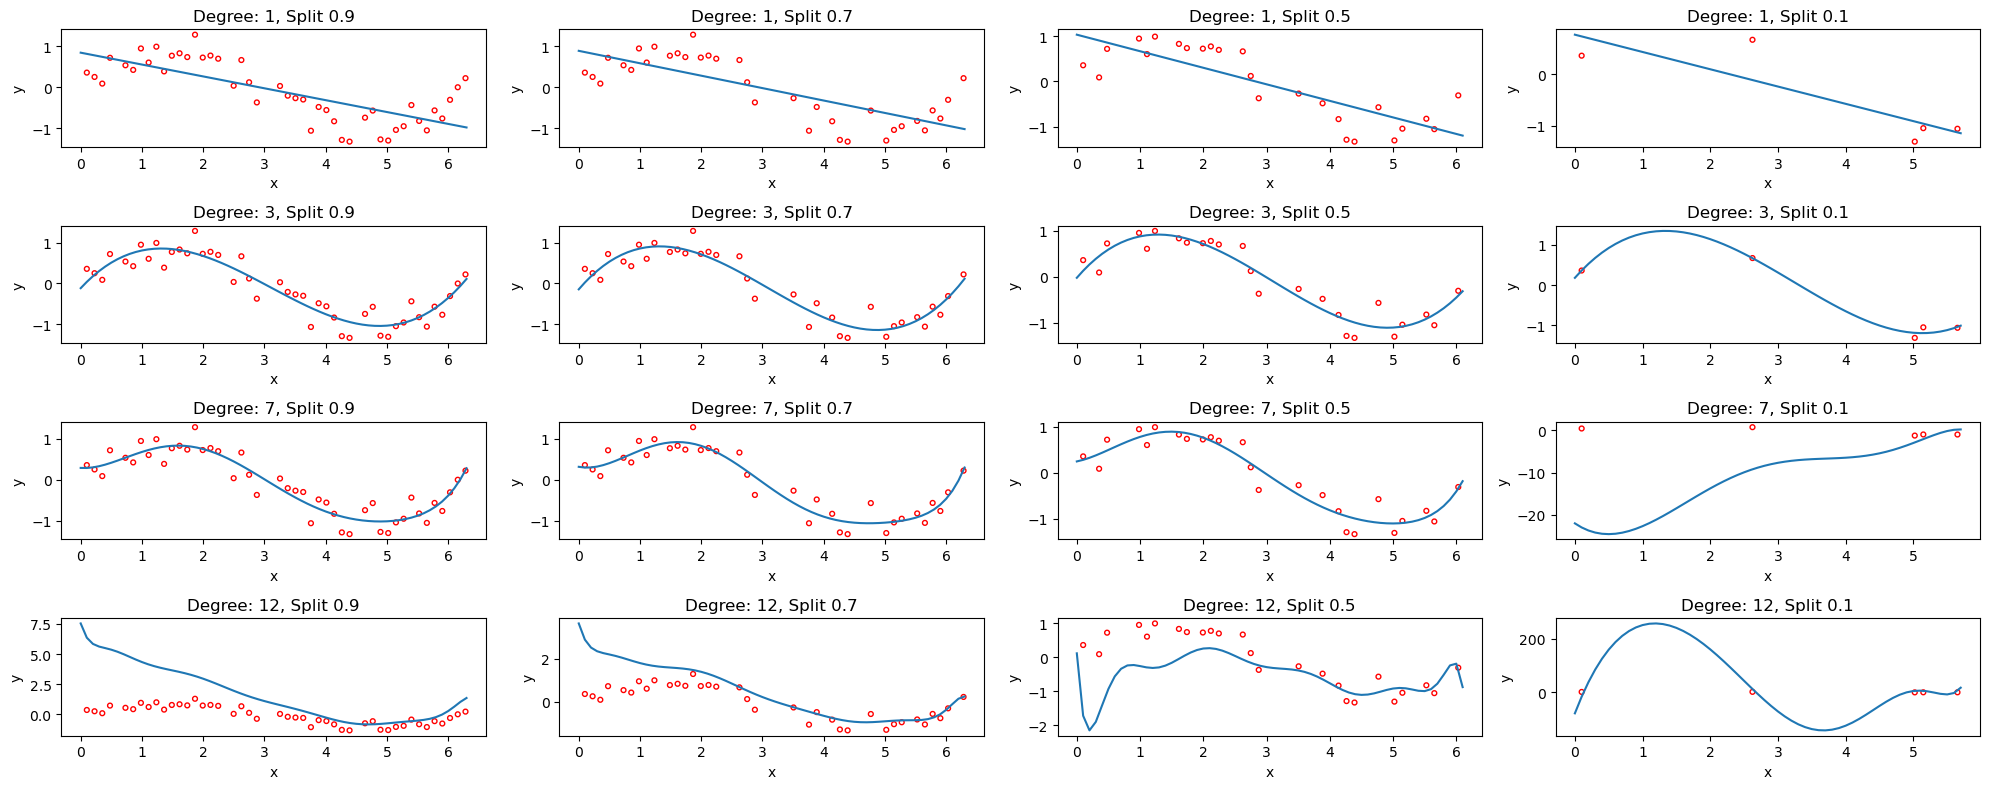

In [81]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20, 8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(
            x, y, degree, split_ratio, seed
        )
        plot_fitted_curve(y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f"Degree: {degree}, Split {split_ratio}")
plt.tight_layout()

Your graph should look like this:

![alt text](split_demo.png)

# Ridge Regression
Please fill in the function below.

In [82]:
import numpy as np

def ridge_regression(y, tx, lambda_):
    """Implement ridge regression using the normal equation.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: scalar, regularization parameter.

    Returns:
        w: optimal weights, numpy array of shape (D,), D is the number of features.
    """
    N, D = tx.shape  # N: number of samples, D: number of features
    lambda_identity = lambda_ * 2 * N * np.eye(D)  # Regularization term (scaled by 2*N)
    
    # Compute the ridge regression weights
    w = np.linalg.inv(tx.T @ tx + lambda_identity) @ tx.T @ y
    return w


In [83]:
test(ridge_regression)

Could not find any tests for ridge_regression


In [86]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_regression_demo(x, y, degree, ratio, seed):
    """Ridge regression demo with varying lambda values."""
    # Define parameter: lambdas for regularization
    lambdas = np.logspace(-5, 0, 15)  # Creates 15 values from 10^-5 to 10^0

    # Step 1: Split the data into training and testing sets
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)

    # Step 2: Form the polynomial basis for training and test data
    X_train_poly = build_poly(x_train, degree)
    X_test_poly = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []

    for ind, lambda_ in enumerate(lambdas):
        # Step 3: Perform ridge regression with the current lambda
        weights = ridge_regression(y_train, X_train_poly, lambda_)

        # Step 4: Predict on the training and test data
        y_train_pred = X_train_poly @ weights
        y_test_pred = X_test_poly @ weights

        # Step 5: Compute RMSE for training and testing sets
        rmse_train = np.sqrt(2 * np.mean((y_train - y_train_pred) ** 2))
        rmse_test = np.sqrt(2 * np.mean((y_test - y_test_pred) ** 2))

        # Store the RMSE values for plotting later
        rmse_tr.append(rmse_train)
        rmse_te.append(rmse_test)

        # Print the current status
        print(
            "proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
                p=ratio, d=degree, l=lambda_, tr=rmse_train, te=rmse_test
            )
        )

    # Step 6: Plot the RMSE for training and testing data over different lambda values
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.321, Testing RMSE=0.477
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.321, Testing RMSE=0.477
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.321, Testing RMSE=0.476
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.322, Testing RMSE=0.474
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.322, Testing RMSE=0.473
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.323, Testing RMSE=0.471
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.324, Testing RMSE=0.466
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.326, Testing RMSE=0.452
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.328, Testing RMSE=0.427
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.335, Testing RMSE=0.400
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.348, Testing RMSE=0.390
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.374, Testing RMSE=0.421
proportion=0.5, degree=7, lambda=0.193, 

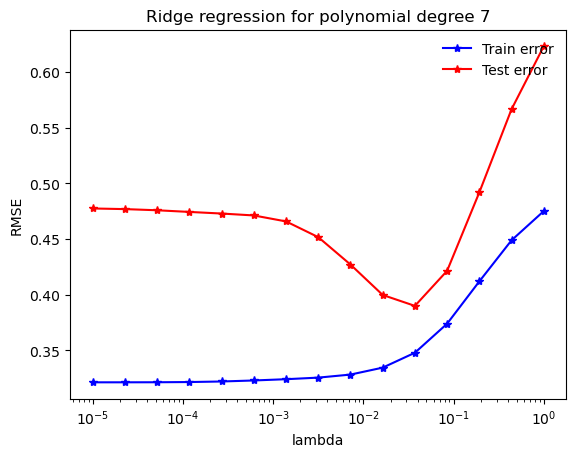

In [87]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

Your plot should look like:

![alt text](ridge_regression.png)